# Chapter 4: Testing and regularization with Turi Create

In [21]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn as sk
random.seed(0)

## Defining our dataset

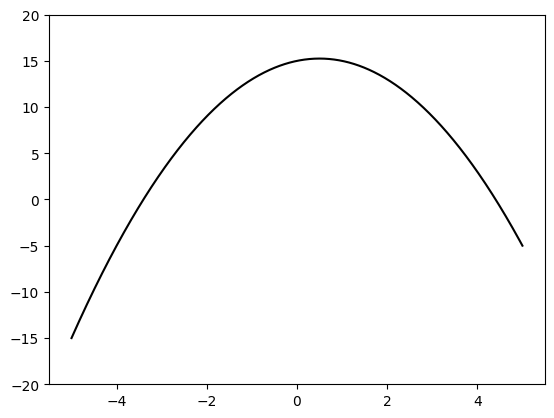

In [22]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [23]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)

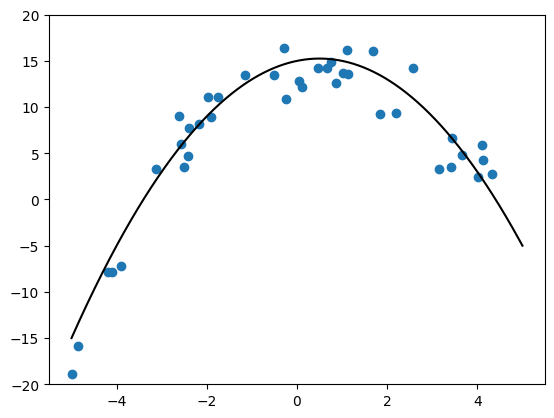

In [24]:
plt.scatter(X, Y)
draw_polynomial(coefs)

## Training a polynomial regression model

In [25]:
data = pd.DataFrame({"X":X, "Y":Y})
data.head()

,X,Y
0,3.444219,6.685961
1,-2.410832,4.690236
2,0.112747,12.205789
3,-1.966873,11.133218
4,-0.234030,10.927272


### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [26]:

max_pow = 10
for i in range(2, max_pow+1):
    string = "x^" + str(i)
    new_column = pd.Series(data['X'].apply(lambda x:x**i), name=string)
    data = pd.concat([data, new_column], axis=1)
data.head()

,X,Y,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10
0,3.444219,6.685961,11.862641,40.857528,140.722256,484.678199,1669.337627,5.749564e+03,1.980275e+04,6.820501e+04,2.349130e+05
1,-2.410832,4.690236,5.812113,-14.012032,33.780661,-81.439516,196.337032,-4.733357e+02,1.141133e+03,-2.751081e+03,6.632395e+03
2,0.112747,12.205789,0.012712,0.001433,0.000162,0.000018,0.000002,2.316012e-07,2.611239e-08,2.944099e-09,3.319389e-10
3,-1.966873,11.133218,3.868588,-7.609021,14.965976,-29.436170,57.897201,-1.138764e+02,2.239804e+02,-4.405410e+02,8.664881e+02
4,-0.234030,10.927272,0.054770,-0.012818,0.003000,-0.000702,0.000164,-3.845092e-05,8.998685e-06,-2.105966e-06,4.928603e-07


## Splitting data into training and testing

In [27]:
train, test = sk.model_selection.train_test_split(data, random_state=42)
features = train.drop(columns=['Y'])
features.head()

,X,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10
25,-0.520304,0.270717,-0.140855,0.073287,-0.038132,0.019840,-0.010323,0.005371,-0.002795,1.454032e-03
9,4.021660,16.173745,65.045296,261.590033,1052.026042,4230.890529,17015.201109,68429.345261,275199.526749,1.106759e+06
13,1.108870,1.229592,1.363457,1.511897,1.676496,1.859016,2.061407,2.285832,2.534690,2.810640e+00
31,1.031856,1.064727,1.098646,1.133644,1.169758,1.207022,1.245473,1.285150,1.326090,1.368334e+00
34,0.756510,0.572308,0.432956,0.327536,0.247784,0.187451,0.141809,0.107280,0.081158,6.139706e-02


In [28]:
def display_results(model, test_x, test_y):
    coefs = [model.intercept_] + list(model.coef_)
    print(coefs)
    print("Testing error (rmse):", sk.metrics.mean_squared_error(test_y, model.predict(test_x)))
    plt.scatter(test_x["X"], test_y)
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")

## Training a polynomial regression model with no regularization

In [29]:
model_no_reg = sk.linear_model.LinearRegression()
model_no_reg.fit(features, train["Y"])


LinearRegression()

[np.float64(13.895794137424108), np.float64(0.6541820444559019), np.float64(-0.9151807347103659), np.float64(-0.16329027773518554), np.float64(0.04559387208764621), np.float64(0.049223297273021625), np.float64(-0.007965193929730989), np.float64(-0.004457607604015401), np.float64(0.00019624180526735258), np.float64(0.00013654997568302019), np.float64(6.625650189162613e-06)]
Testing error (rmse): 3.372976919509755


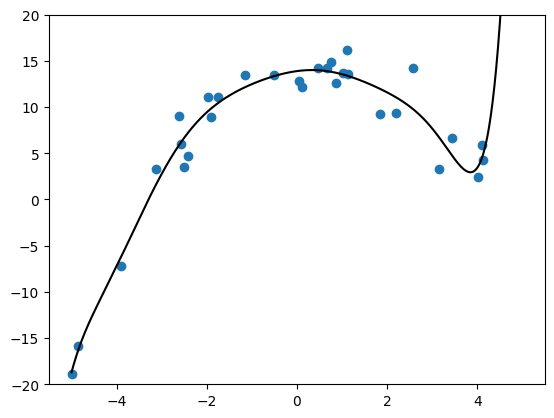

Polynomial coefficients


In [30]:
display_results(model_no_reg, features, train["Y"])

## Training a polynomial regression model with L1 regularization

In [31]:
model_L1_reg = sk.linear_model.Lasso(alpha=0.1, max_iter=10000)
model_L1_reg.fit(features, train["Y"])

c:\Users\maskf\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.357e+01, tolerance: 2.082e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, max_iter=10000)

[np.float64(13.70171961110944), np.float64(0.0), np.float64(-0.4200621941968738), np.float64(0.19617263849419894), np.float64(-0.08351850298660628), np.float64(-0.014928748803377814), np.float64(0.002037322231159013), np.float64(0.0001373279290752242), np.float64(4.496015767938407e-05), np.float64(2.2515441080774346e-05), np.float64(1.3954812511678176e-06)]
Testing error (rmse): 3.4351032029019923


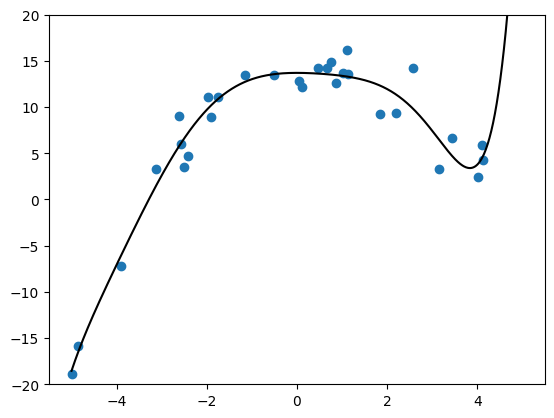

Polynomial coefficients


In [32]:
display_results(model_L1_reg, features, train["Y"])

## Training a polynomial regression model with L2 regularization

In [33]:
model_L2_reg = sk.linear_model.Ridge(alpha=0.1, max_iter=10000)
model_L2_reg.fit(features, train["Y"])

Ridge(alpha=0.1, max_iter=10000)

[np.float64(13.883894751830326), np.float64(0.6262643287721364), np.float64(-0.8852552451791238), np.float64(-0.1468654264062552), np.float64(0.03717238377017354), np.float64(0.046154215354418826), np.float64(-0.007225747626688052), np.float64(-0.004229869528399679), np.float64(0.00017771126421920415), np.float64(0.00013073665490724197), np.float64(6.52154991856473e-06)]
Testing error (rmse): 3.373133082233329


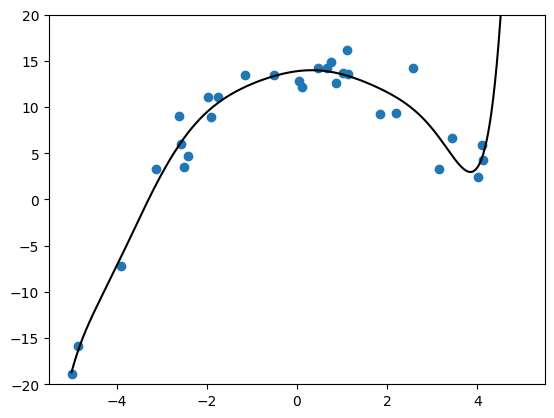

Polynomial coefficients


In [34]:
display_results(model_L2_reg, features, train["Y"])

## Viewing the predictions in the testing set

In [35]:
test_feautures = test.drop(columns=["Y"])

In [36]:
no_reg_mse = sk.metrics.mean_squared_error(test["Y"], model_no_reg.predict(test_feautures))
reg_L1_mse = sk.metrics.mean_squared_error(test["Y"], model_L1_reg.predict(test_feautures))
reg_L2_mse = sk.metrics.mean_squared_error(test["Y"], model_L2_reg.predict(test_feautures))
print(f"No regularization {no_reg_mse}, L1: {reg_L1_mse}, L2: {reg_L2_mse}")

No regularization 8.975259090030951, L1: 5.7270441029501775, L2: 8.751283598190115


L1 regularization WON!!!